<a href="https://colab.research.google.com/github/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/blob/main/Taller%201/Taller%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

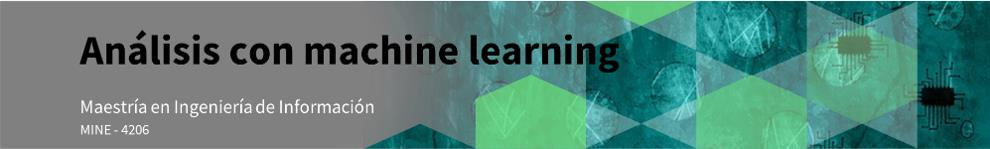

En la actualidad, el sector inmobiliario ruso está en pleno auge. Ofrece muchas oportunidades emocionantes y un alto rendimiento en cuanto a estilos de vida e inversiones. El mercado inmobiliario lleva varios años en fase de crecimiento, lo que significa que todavía se pueden encontrar propiedades a precios muy atractivos, pero es muy probable que aumenten en el futuro.
Para poder entender el mercado, una inmobiliaria rusa le ha brindado la información de la venta de más de 45 mil inmuebles entre los años de 2018 y 2021. Y quieren entender cuáles son las características principales que inciden en los precios de venta, para poder proponer planes de construcción de inmuebles en las áreas urbanas disponibles, que tomen en cuenta estas características.

Para poder tomar decisiones en este estudio, se debe presentar:

* Una tabla comparativa, mostrando el rendimiento los tres mejores modelos entrenados con regresión polinomial, ridge y lasso.
* Un análisis de las variables que se consideraron importantes en la predicción con base en el modelo lasso.

* ¿Cuál sería el rendimiento esperado si se escogiera su modelo a producción?

## Diccionario de Datos

La inmobiliaria, le ha construido el siguiente diccionario de datos:
* date - Fecha de publicación del anuncio.
* time - Tiempo que la publicación estuvo activo.
* geo_lat - Latitud.
* geo_lon - Longitud.
* region - Region de Rusia. Hay 85 regiones en total.
* building_type - Tipo de Fachada. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden.
* object_type - Tipo de Apartmento. 1 - Secondary real estate market; 2 - New building.
* level - Piso del Apartamento.
* levels - Número de pisos.
* rooms - Número de Habitaciones. Si el valor es "-1", Significa que es un  "studio apartment".
* area - Área total del apartamento.
* kitchen_area - Área de la Cocina
* price - Precio. En rublos

# Desarrollo del taller

## 1 - Configuración del ambiente

In [1]:
# libraries import

import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt

# data profiling
from pandas_profiling import ProfileReport

# model training
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


## 2 - Analísis de los datos
### 2.1 - Importación y presentación de los datos

In [2]:
# define the data origin
#raw_data_url = 'https://github.com/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/blob/main/Taller%201/russian_prices.csv';
raw_data_url = '/Users/danielp/Documents/uni/ML analisys/examples/notebook/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/Taller 1/russian_prices.csv'

data = pd.read_csv(raw_data_url)
data.head()


,Unnamed: 0,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,14040,3900000,2018-09-10,12:40:14,55.786480,49.223459,2922.0,1.0,10.0,11.0,3.0,67.00,8.80,1.0
1,24608,4250000,2018-09-11,17:26:15,55.905045,37.393578,81.0,1.0,25.0,25.0,1.0,39.00,10.50,1.0
2,76636,4340360,2018-09-18,02:35:04,59.882717,30.451298,2661.0,0.0,4.0,27.0,1.0,57.11,11.38,1.0
3,31944,8000000,2018-09-12,21:40:17,55.640462,37.359415,3.0,1.0,1.0,17.0,3.0,74.50,10.00,1.0
4,82427,2750000,2018-09-18,06:18:38,55.042053,82.940926,9654.0,1.0,1.0,5.0,2.0,44.60,6.00,1.0



## 3 - Preparación de datos
### 2.1 - Segmentación de los datos

In [3]:
# data splitting in training and test subsets
train, test = train_test_split(data, test_size=0.2, random_state=33)
train.head()

,Unnamed: 0,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
14897,8565,670000,2018-09-09,16:58:11,61.647906,50.867897,4417.0,5.0,1.0,2.0,2.0,37.0,6.0,1.0
29216,6814,6019600,2018-09-09,09:40:42,55.671999,37.860235,81.0,2.0,17.0,33.0,2.0,59.6,20.3,11.0
48722,53863,3218600,2018-09-15,23:32:21,57.696745,39.791132,2604.0,0.0,3.0,16.0,3.0,73.0,10.0,11.0
20328,81369,2400000,2018-09-18,05:06:29,47.237957,39.696465,3230.0,3.0,2.0,5.0,2.0,42.0,6.0,1.0
12495,47951,6952000,2018-09-14,19:43:56,59.885442,30.449805,2661.0,2.0,15.0,22.0,3.0,86.9,19.2,11.0


### 2.2 - Perfilamiento de los datos de entrenamiento

In [4]:
# show information about the unprocessed training data
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices